# Hotel booking

### Initialization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data:
full_data = pd.read_csv('data.csv')

In [ ]:
full_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015


In [ ]:
full_data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                1
meal                                  1
country                             465
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              7827
company                           33299


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36296 entries, 0 to 36295
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           36296 non-null  object 
 1   is_canceled                     36296 non-null  int64  
 2   lead_time                       36296 non-null  int64  
 3   arrival_date_year               36296 non-null  int64  
 4   arrival_date_month              36296 non-null  object 
 5   arrival_date_week_number        36296 non-null  int64  
 6   arrival_date_day_of_month       36296 non-null  int64  
 7   stays_in_weekend_nights         36296 non-null  int64  
 8   stays_in_week_nights            36296 non-null  int64  
 9   adults                          36296 non-null  int64  
 10  children                        36296 non-null  int64  
 11  babies                          36295 non-null  float64
 12  meal                            

### Data Cleaning

In [ ]:
NaN_replacements = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}
full_data_clean = full_data.fillna(NaN_replacements)
#All the undefined meals are considered as SC meals
full_data_clean["meal"].replace("Undefined", "SC", inplace=True)
#Data points with 0 occupants(0 adults + 0 children + 0 babies) are removed
zero_guests = list(full_data_clean[full_data_clean["adults"]
                   + full_data_clean["children"]
                   + full_data_clean["babies"]==0].index)
full_data_clean.drop(full_data_clean.index[zero_guests], inplace=True)

In [ ]:
full_data_clean.to_csv(r'Hotel3.csv', index = False)

In [ ]:
full_data_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            1
meal                              1
country                           0
market_segment                    1
distribution_channel              1
is_repeated_guest                 1
previous_cancellations            1
previous_bookings_not_canceled    1
reserved_room_type                1
assigned_room_type                1
booking_changes                   1
deposit_type                      1
agent                             0
company                           0
days_in_waiting_list              1
customer_type                     1
adr                         

In [ ]:
full_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-2015


## EDA

In [ ]:
#Separating the data on the basis of hotels
resort = full_data_clean[full_data_clean['hotel'] == 'Resort Hotel']
city = full_data_clean[full_data_clean['hotel'] == 'City Hotel']

In [ ]:
# city.head()

### Cancellation by repeated guests

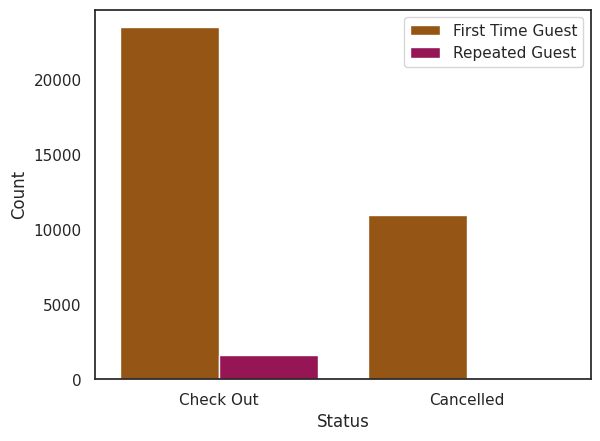

In [ ]:
#Let's check how many have cancelled their booking in the respective hotels

ax = sns.countplot(x="is_canceled", hue="is_repeated_guest", data=full_data_clean, palette = 'brg_r')
ax.set(xlabel='Status', ylabel='Count')
positions = (0, 1)
labels = ("Check Out", "Cancelled")
ax.set_xticklabels(labels)
LAB = {'Repeated Guest','First Time Guest'}
ax.legend(labels=LAB)

In [ ]:
# #Now we extract those bookings which havent been cancelled and analyze it
rc = resort[resort['is_canceled'] == 0]
cc = city[city['is_canceled'] == 0]

### Most Busy Month

Text(0, 0.5, 'Number of Bookings')

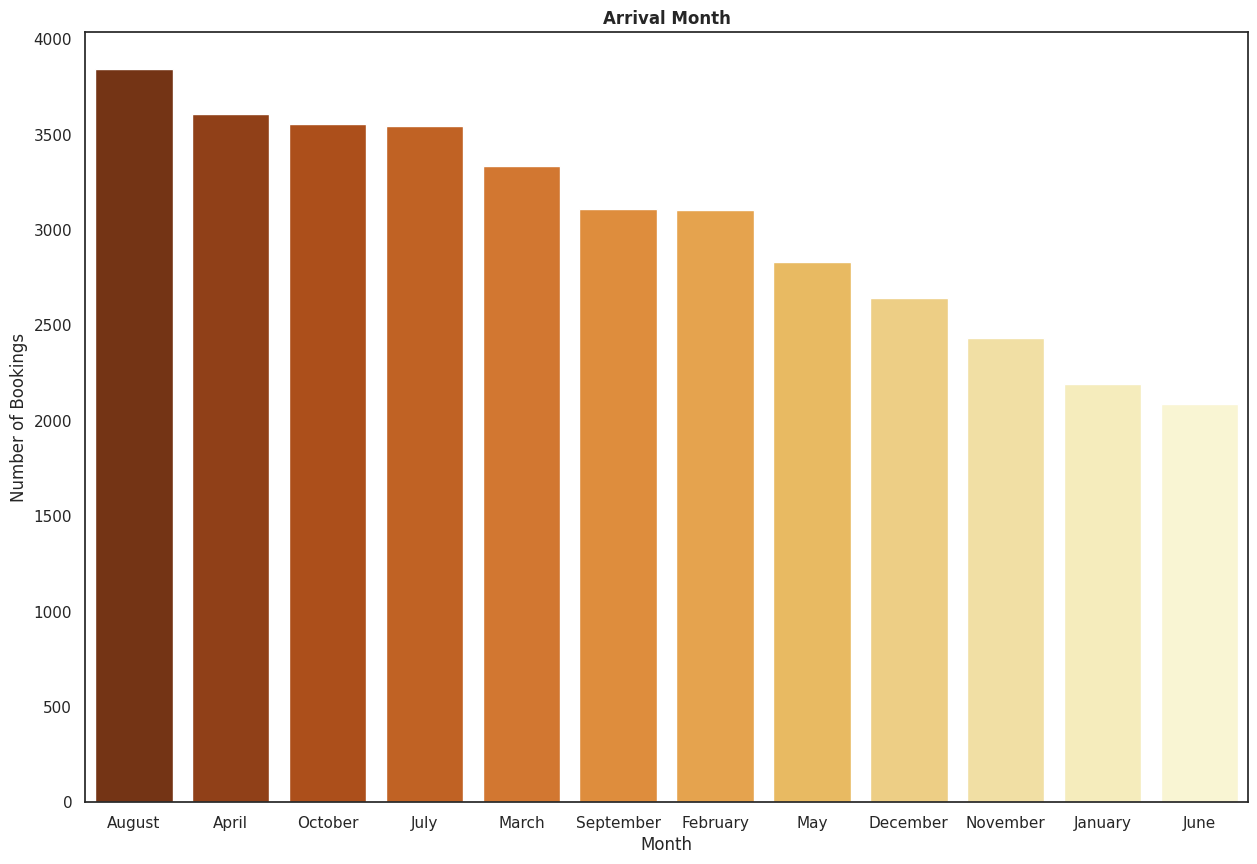

In [ ]:
#`arrival_date_month` exploration

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = full_data_clean,
              order=pd.value_counts(full_data_clean['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)

### Where do the guests come from?

In [ ]:
# get number of acutal guests by country
country_data = pd.DataFrame(full_data_clean[full_data_clean["is_canceled"] == 0]["country"].value_counts())
country_data.index.name = "country"
# The resulting DataFrame from value_counts() has a single unnamed column with the counts
# We rename it to "Number_of_Guests"
country_data.rename(columns={country_data.columns[0]: "Number_of_Guests"}, inplace=True)
total_guests = country_data["Number_of_Guests"].sum()
country_data["Guests in %"] = round(country_data["Number_of_Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# pie plot
fig = px.pie(country_data,
             values="Number_of_Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

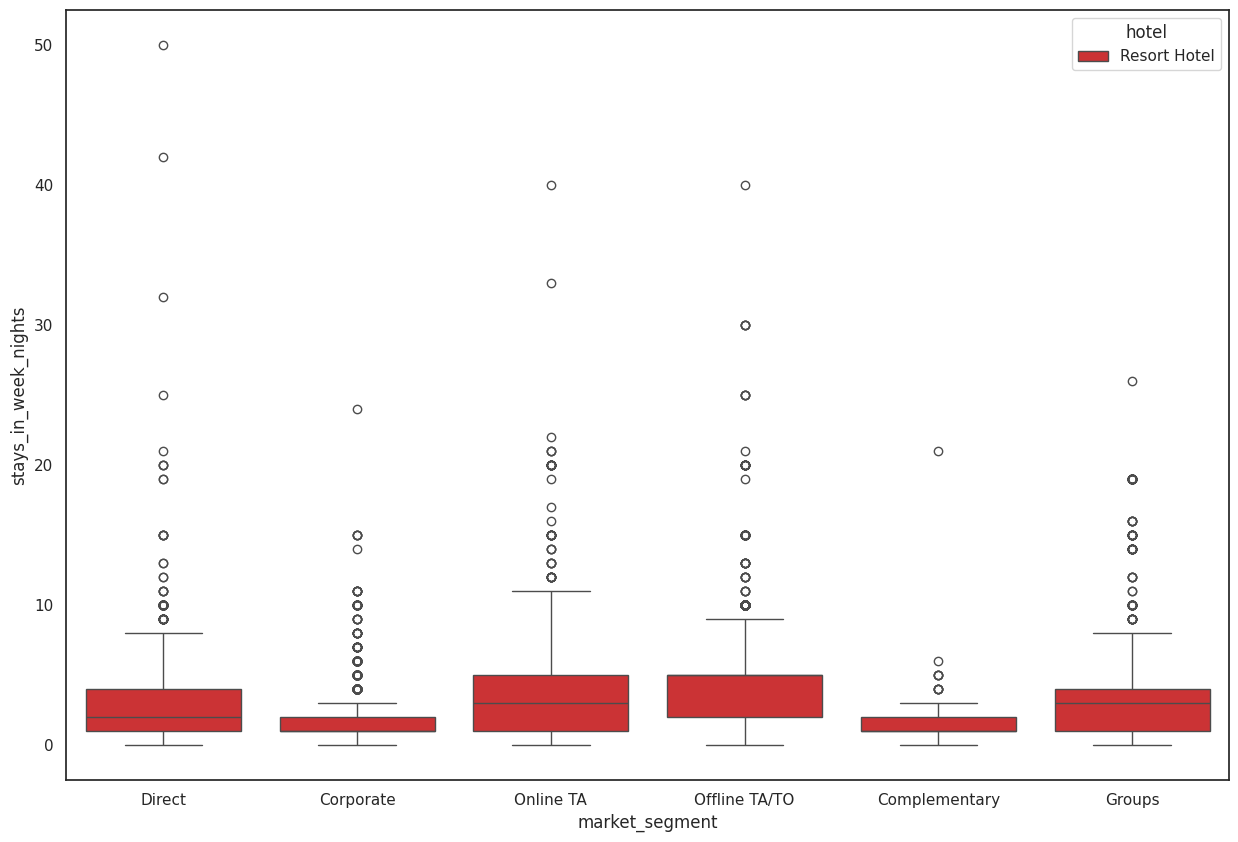

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

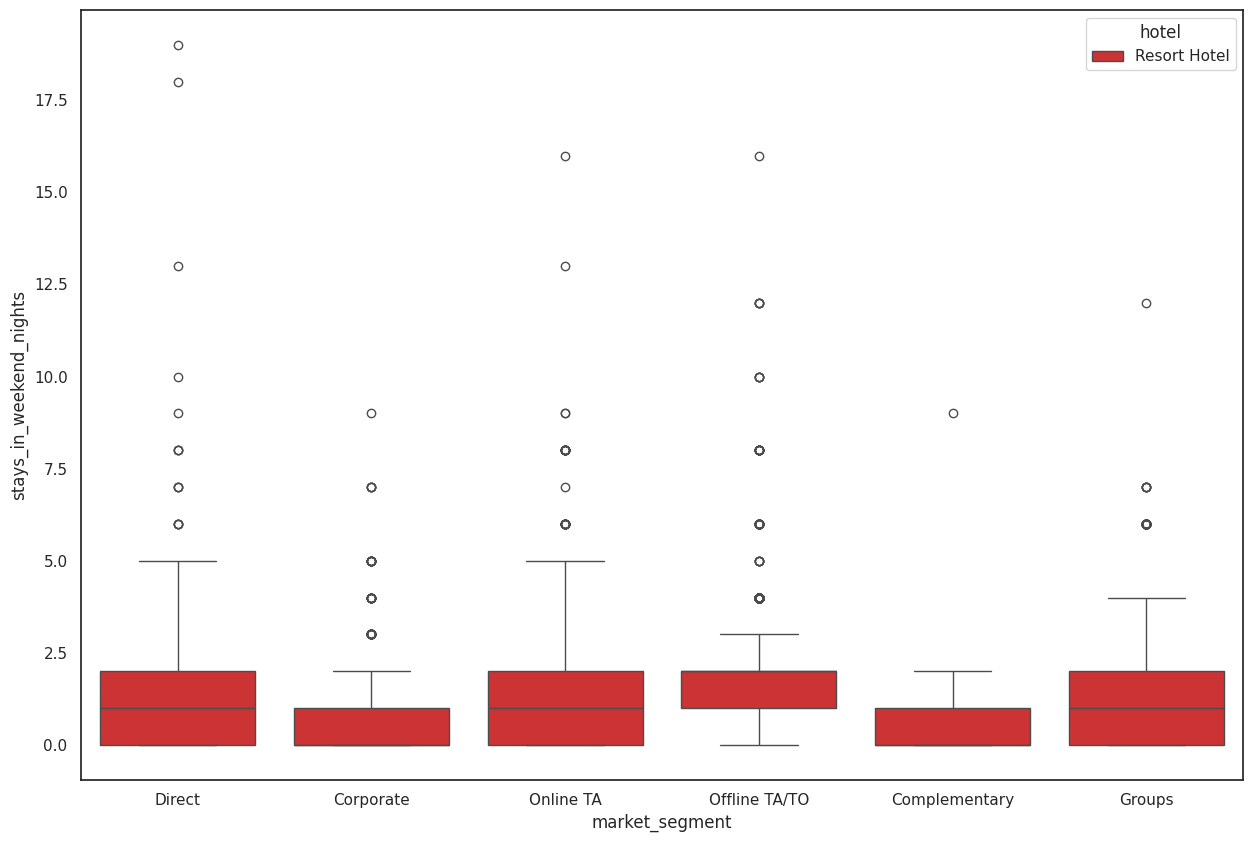

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
full_data_clean['number_of_nights'] = full_data_clean['stays_in_weekend_nights'] + full_data_clean['stays_in_week_nights']

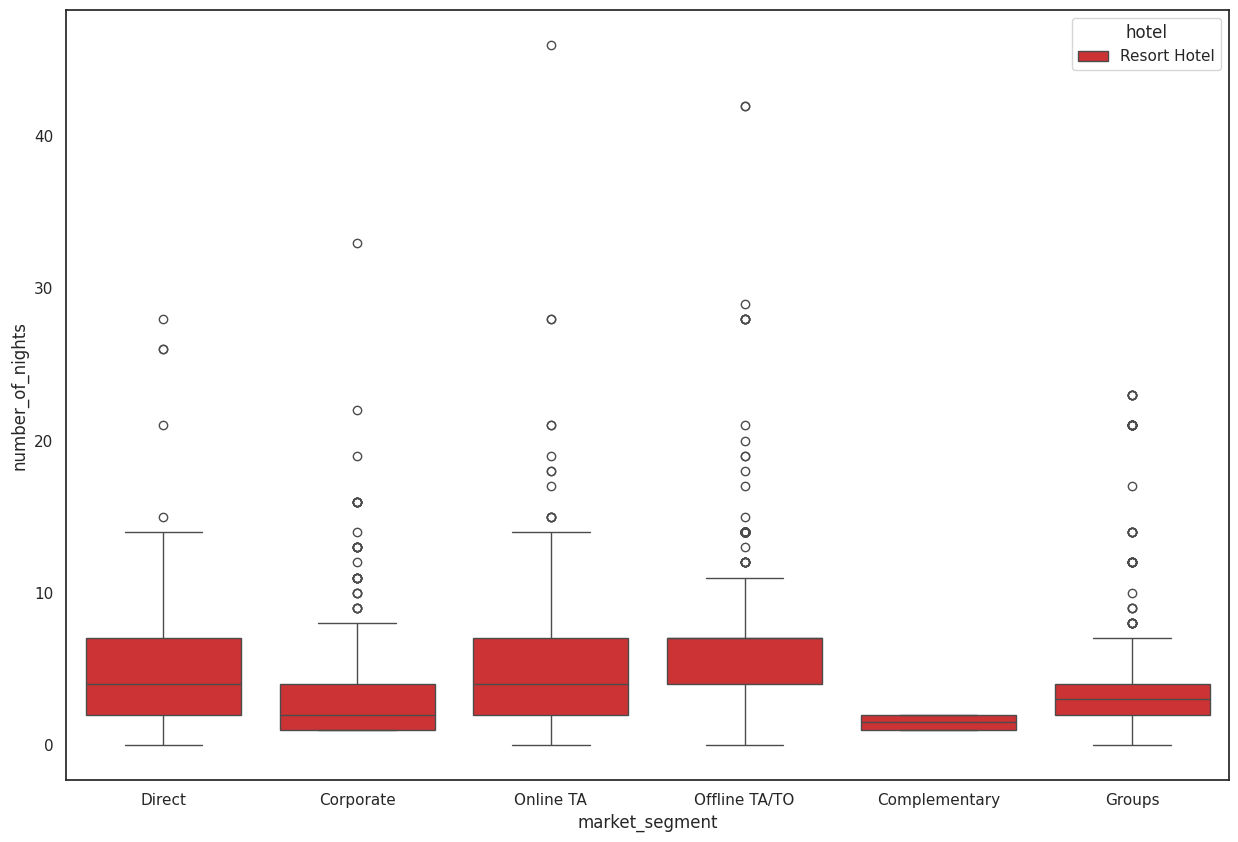

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "number_of_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "number_of_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

ValueError: Could not interpret value `number_of_nights` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x1000 with 0 Axes>

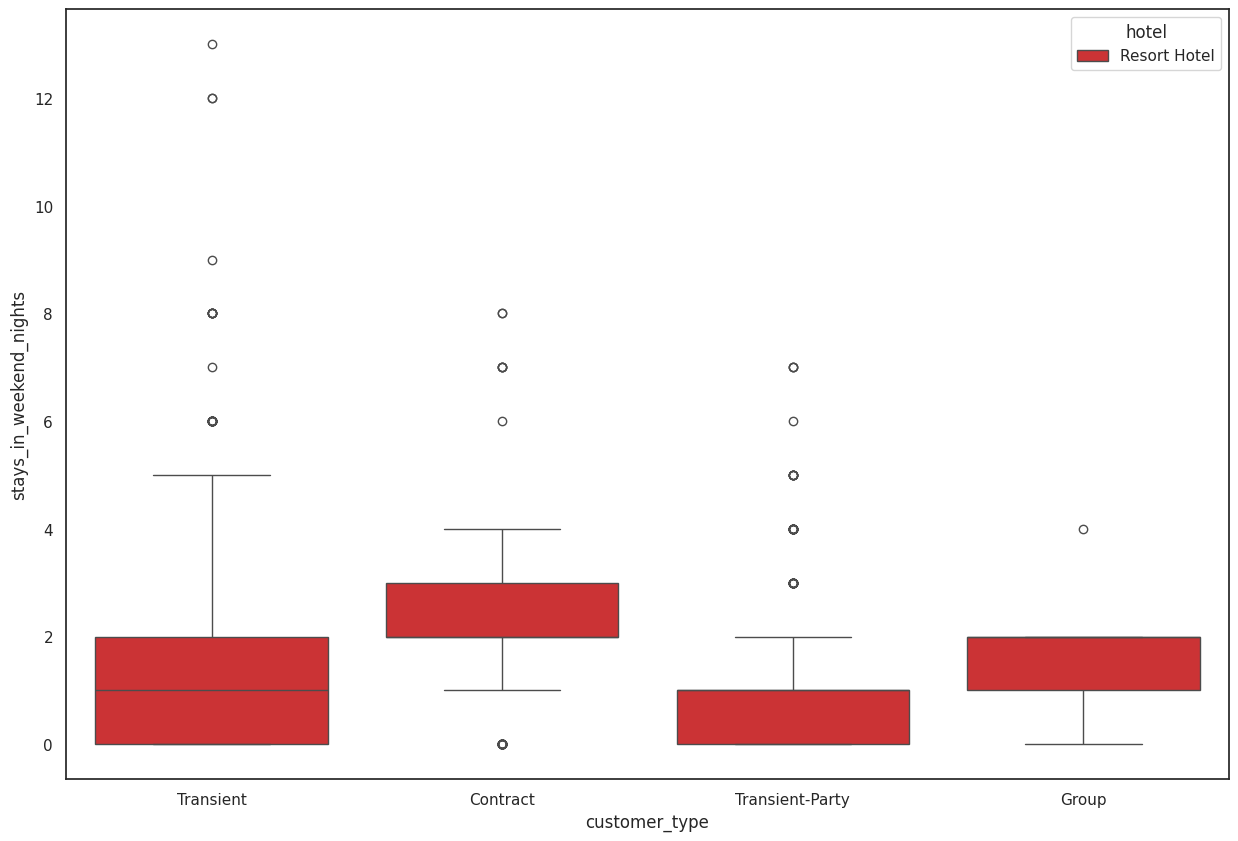

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "stays_in_weekend_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

[Text(0.5, 0, 'Customer Type')]

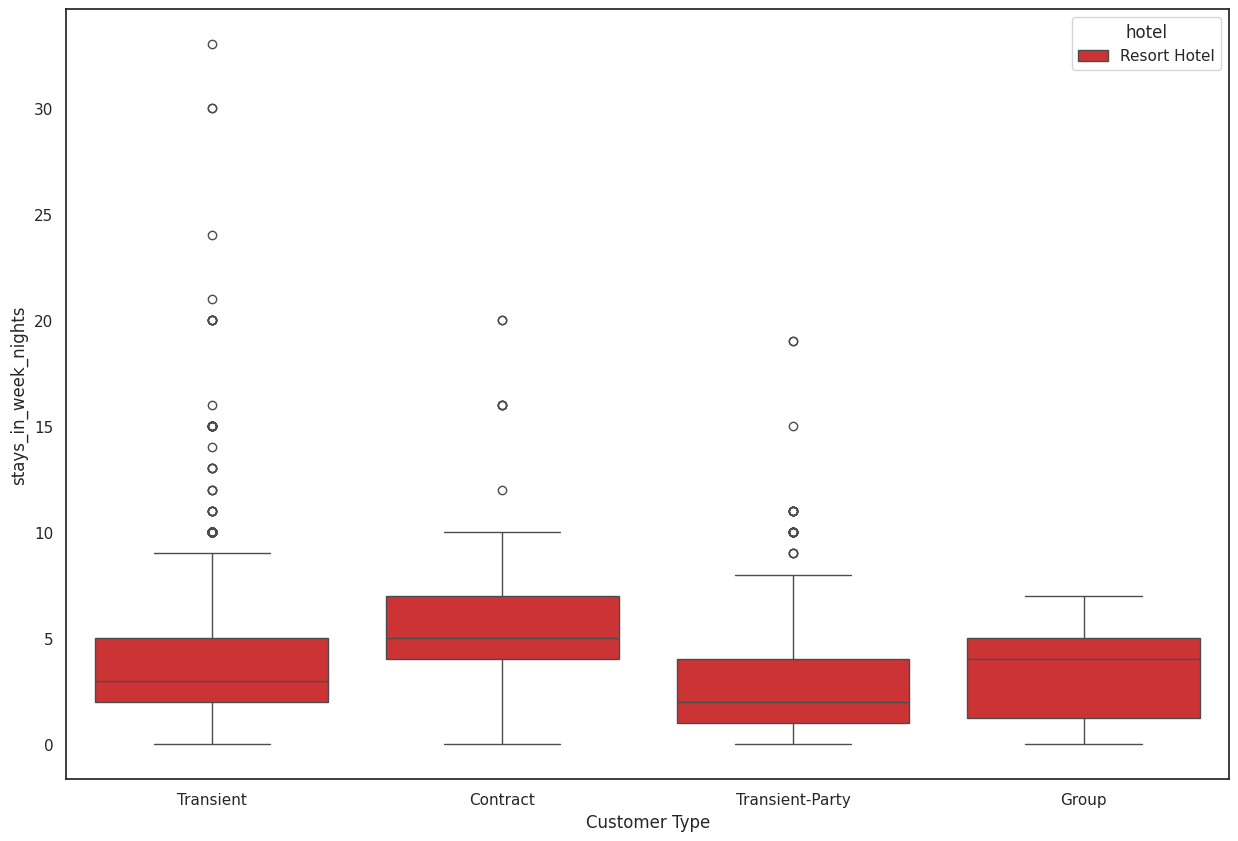

In [ ]:
plt.figure(figsize = (15,10))
ab = sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');
ab.set(xlabel='Customer Type')

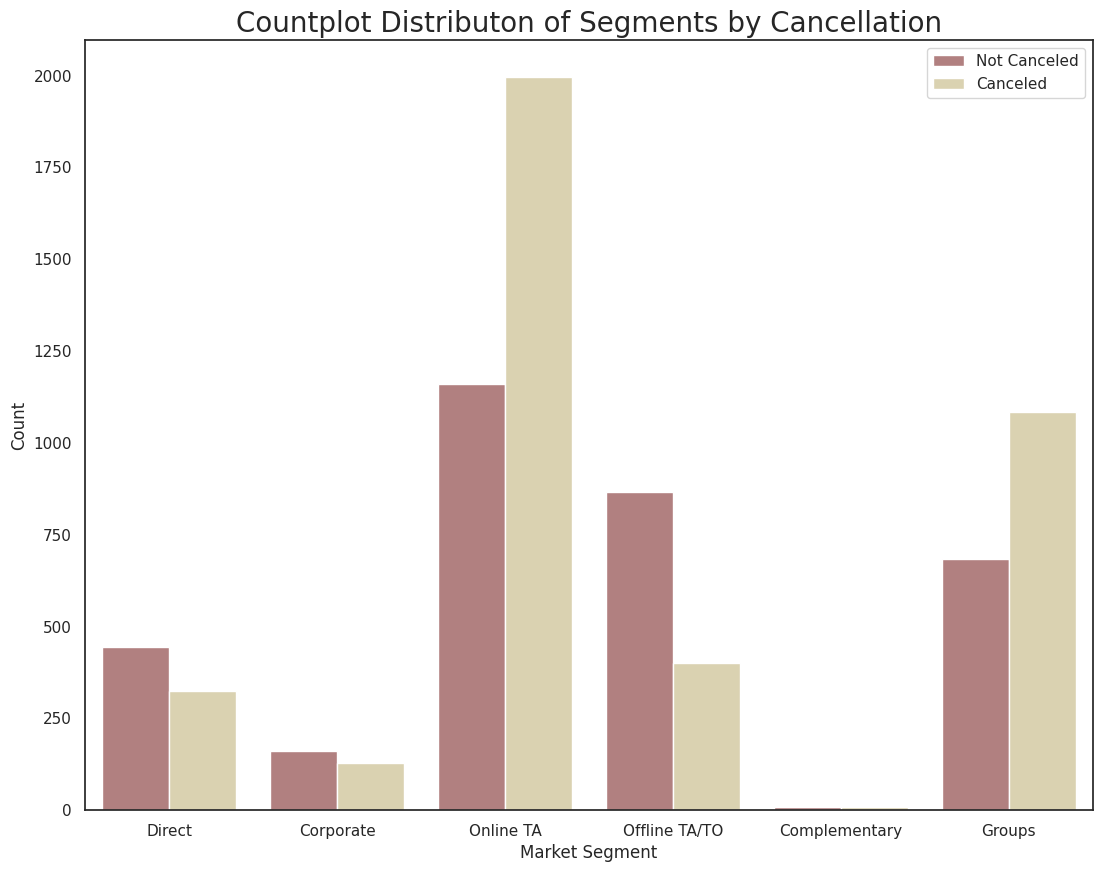

In [ ]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="is_canceled", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
LAB = {'Canceled','Not Canceled'}
ax.legend(labels=LAB)

Text(0.5, 1.0, 'Countplot Distributon of Segments by Cancellation')

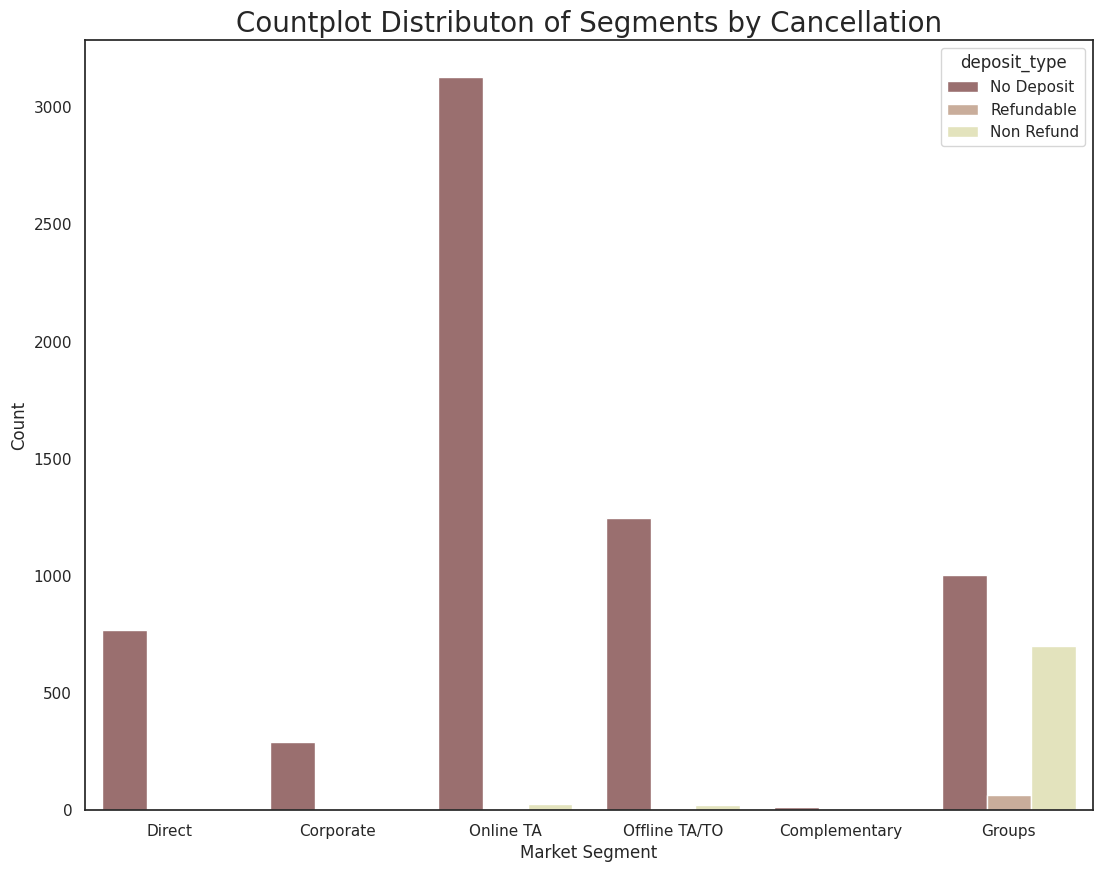

In [ ]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="deposit_type", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})

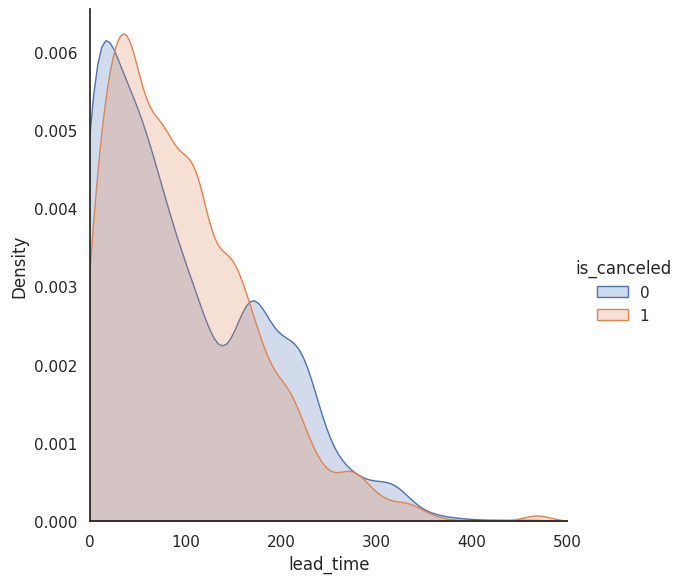

In [ ]:
(sns.FacetGrid(full_data_clean, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

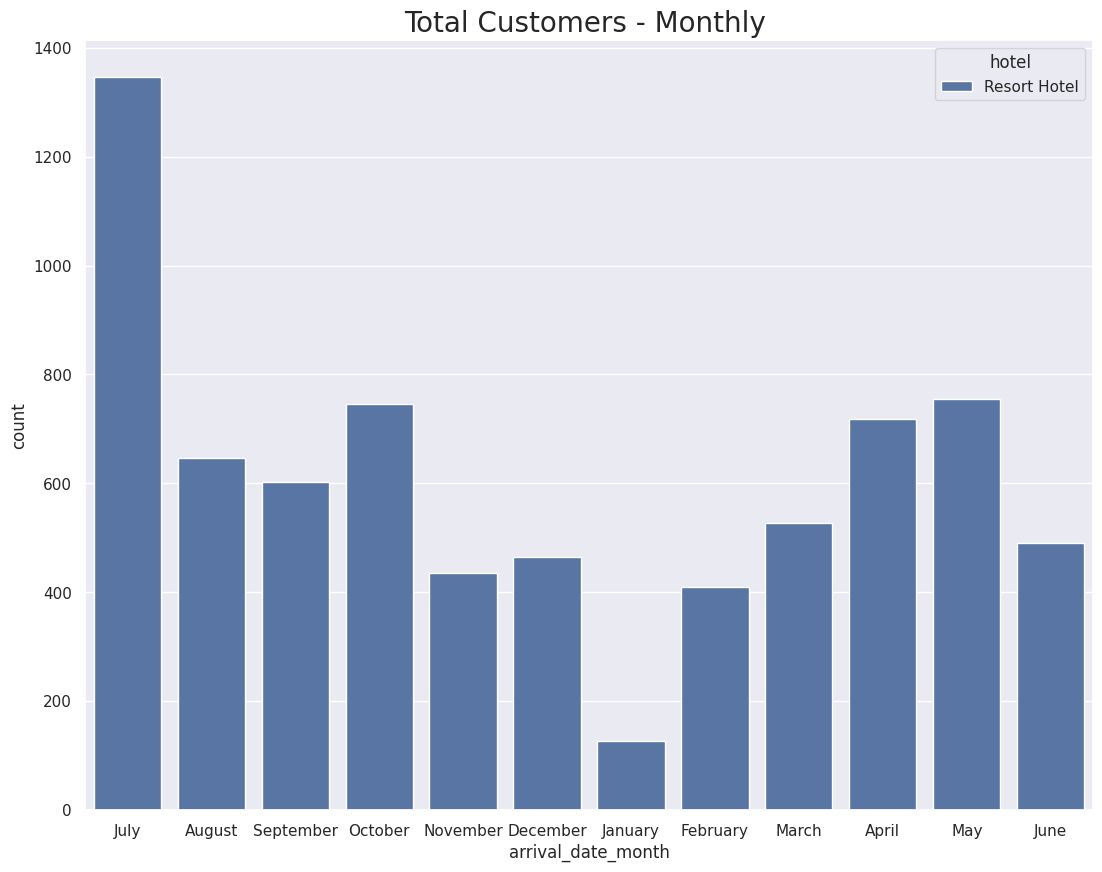

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = full_data_clean)

### How much do guests pay for a room per night?  

In [ ]:
# rc["adr_pp"] = rc["adr"] / (rc["adults"] + rc["children"])
# cc["adr_pp"] = cc["adr"] / (cc["adults"] + cc["children"])

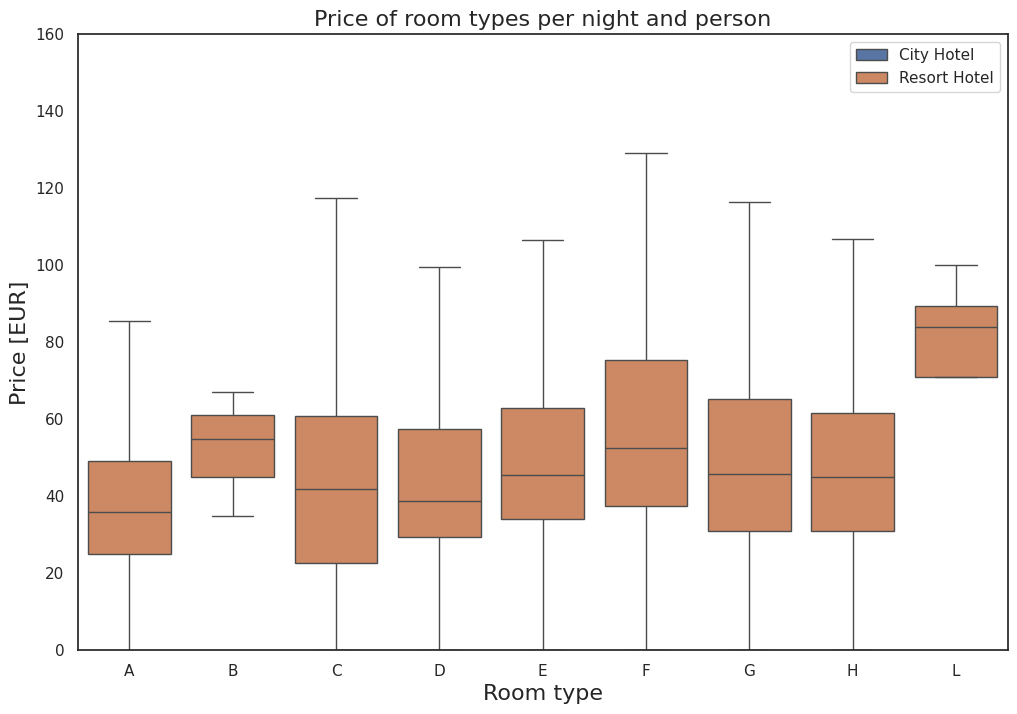

In [ ]:
full_data_clean["adr_pp"] = full_data_clean["adr"] / (full_data_clean["adults"] + full_data_clean["children"])
full_data_guests = full_data_clean[full_data_clean["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

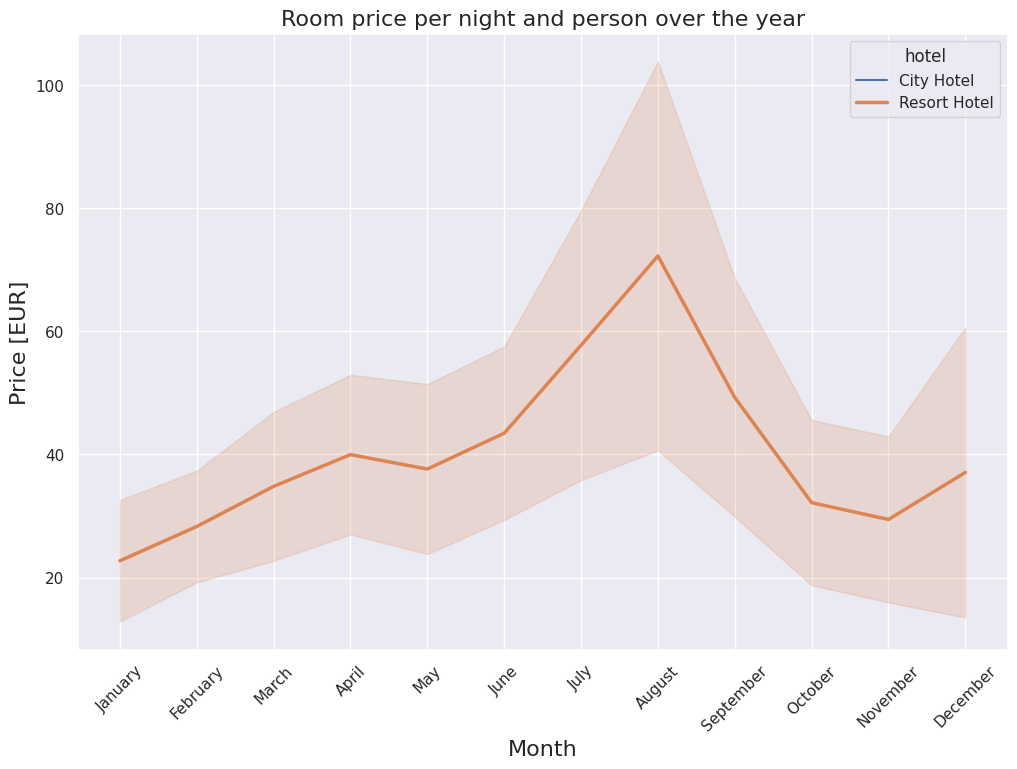

In [ ]:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly,
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

Text(0.5, 1.0, 'ADR vs Arrival Month')

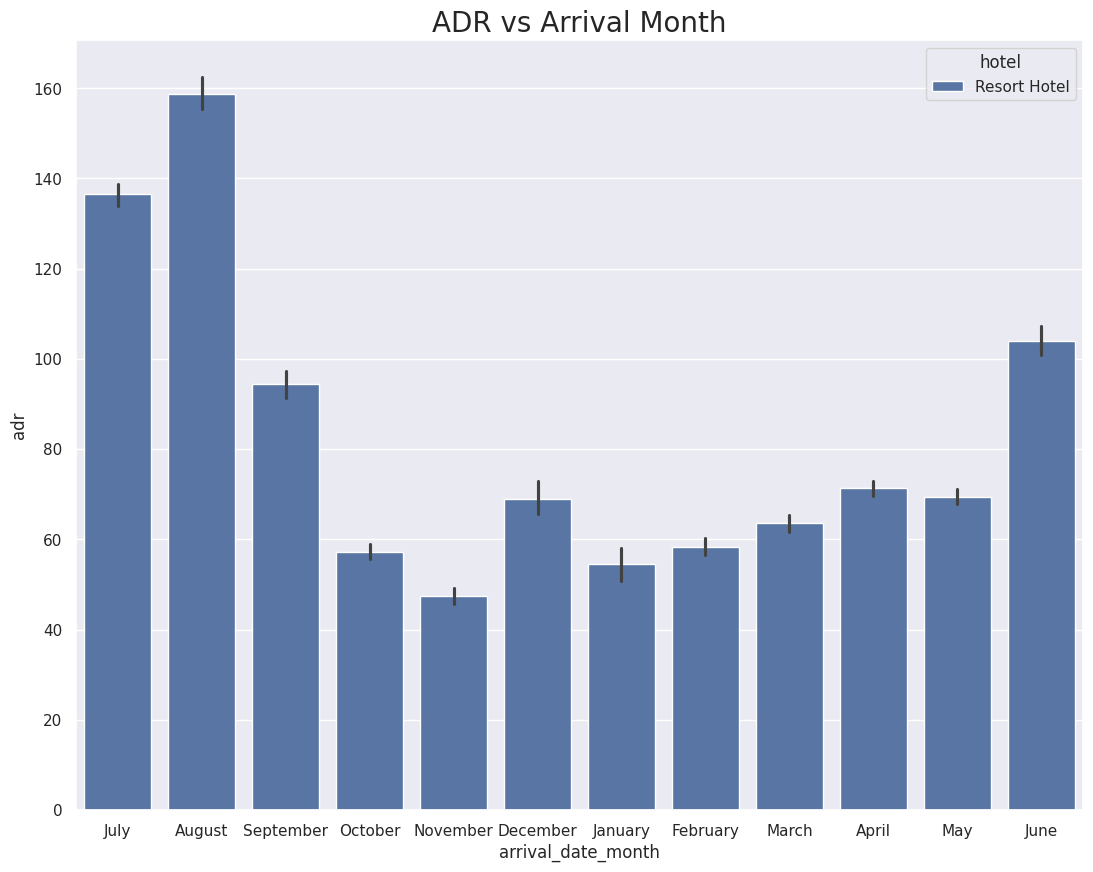

In [ ]:
plt.figure(figsize =(13,10))
ax = sns.barplot(x='arrival_date_month', y="adr",hue="hotel",data=full_data_clean)
plt.title("ADR vs Arrival Month", fontdict={'fontsize': 20})
#ADR is the average daily rate of the hotel

### Cancelation Vs Lead Time

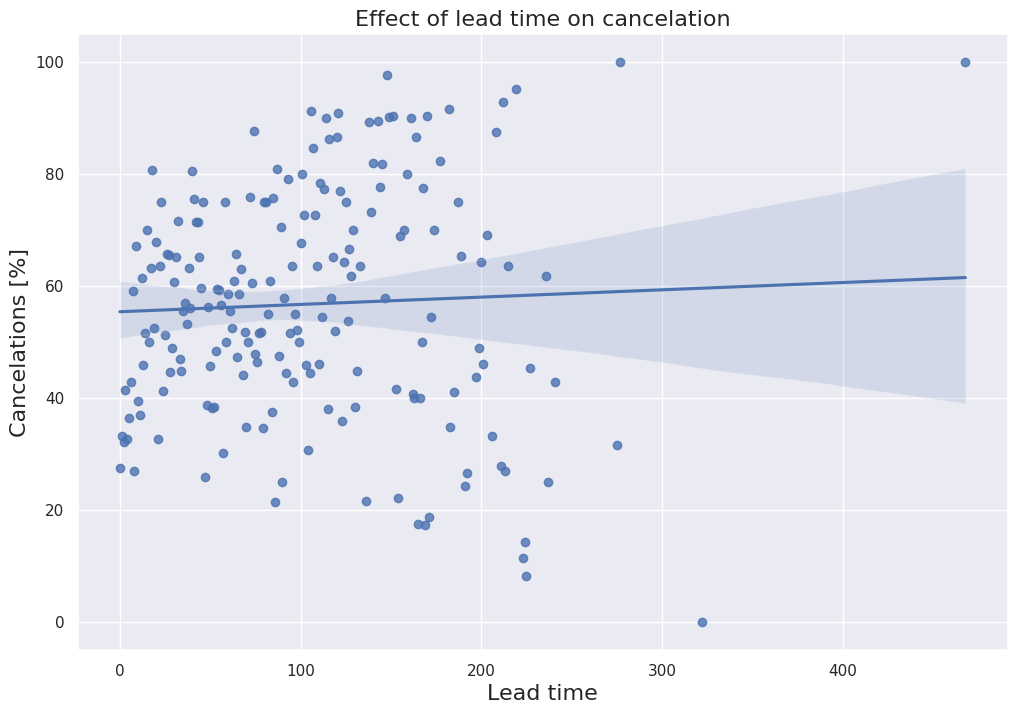

In [ ]:
# group data for lead_time:
lead_cancel_data = full_data_clean.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

## Feature Engineering and Correlation Matrix

In [ ]:
labelencoder = LabelEncoder()
full_data_clean['hotel'] = labelencoder.fit_transform(full_data_clean['hotel'])
full_data_clean['arrival_date_month'] = labelencoder.fit_transform(full_data_clean['arrival_date_month'])
full_data_clean['meal'] = labelencoder.fit_transform(full_data_clean['meal'])
full_data_clean['country'] = labelencoder.fit_transform(full_data_clean['country'])
full_data_clean['market_segment']= labelencoder.fit_transform(full_data_clean['market_segment'])
full_data_clean['distribution_channel']=labelencoder.fit_transform(full_data_clean['distribution_channel'])
full_data_clean['is_repeated_guest'] = labelencoder.fit_transform(full_data_clean['is_repeated_guest'])
full_data_clean['reserved_room_type'] = labelencoder.fit_transform(full_data_clean['reserved_room_type'])
full_data_clean['assigned_room_type'] = labelencoder.fit_transform(full_data_clean['assigned_room_type'])
full_data_clean['deposit_type'] = labelencoder.fit_transform(full_data_clean['deposit_type'])
full_data_clean['agent'] = labelencoder.fit_transform(full_data_clean['agent'])
full_data_clean['customer_type'] = labelencoder.fit_transform(full_data_clean['customer_type'])
full_data_clean['reservation_status'] = labelencoder.fit_transform(full_data_clean['reservation_status'])
full_data_clean['reservation_status_date'] = labelencoder.fit_transform(full_data_clean['reservation_status_date'])

In [ ]:
full_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,number_of_nights,adr_pp
0,0,0,342,2015,5,27,1,0,0,2,...,0.0,0.0,2,0.0,0.0,0.0,1,9,0,0.0
1,0,0,737,2015,5,27,1,0,0,2,...,0.0,0.0,2,0.0,0.0,0.0,1,9,0,0.0
2,0,0,7,2015,5,27,1,0,1,1,...,0.0,0.0,2,75.0,0.0,0.0,1,25,1,75.0
3,0,0,13,2015,5,27,1,0,1,1,...,0.0,0.0,2,75.0,0.0,0.0,1,25,1,75.0
4,0,0,14,2015,5,27,1,0,2,2,...,0.0,0.0,2,98.0,0.0,1.0,1,40,2,49.0


In [ ]:
# Create new feature:`all_children` with merge children and baby features
full_data_clean['all_children'] = full_data_clean['children'] + full_data_clean['babies']
pd.crosstab(full_data_clean['adults'], full_data_clean['all_children'], margins=True, margins_name = 'Total').iloc[:8]

all_children,0,1,2,3,10,Total
adults,,,,,,
1,900,9,8,1,0,918
2,5555,263,299,4,1,6122
3,142,64,1,0,0,207
4,4,0,0,0,0,4
5,2,0,0,0,0,2
6,1,0,0,0,0,1
10,1,0,0,0,0,1
20,2,0,0,0,0,2


In [ ]:
data_categorical = full_data_clean[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel',
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','all_children']]
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7272
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hotel                 7267 non-null   int64
 1   is_canceled           7267 non-null   int64
 2   arrival_date_month    7267 non-null   int64
 3   meal                  7267 non-null   int64
 4   country               7267 non-null   int64
 5   market_segment        7267 non-null   int64
 6   distribution_channel  7267 non-null   int64
 7   is_repeated_guest     7267 non-null   int64
 8   reserved_room_type    7267 non-null   int64
 9   assigned_room_type    7267 non-null   int64
 10  deposit_type          7267 non-null   int64
 11  agent                 7267 non-null   int64
 12  customer_type         7267 non-null   int64
 13  reservation_status    7267 non-null   int64
 14  all_children          7267 non-null   int64
dtypes: int64(15)
memory usage: 908.4 KB


In [ ]:
data_numerical= full_data_clean.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel',
                                       'is_repeated_guest', 'reserved_room_type',
                                       'assigned_room_type','deposit_type','agent',
                                       'customer_type','reservation_status','all_children','adr_pp'], axis = 1)
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7272
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       7267 non-null   int64  
 1   arrival_date_year               7267 non-null   int64  
 2   arrival_date_week_number        7267 non-null   int64  
 3   arrival_date_day_of_month       7267 non-null   int64  
 4   stays_in_weekend_nights         7267 non-null   int64  
 5   stays_in_week_nights            7267 non-null   int64  
 6   adults                          7267 non-null   int64  
 7   children                        7267 non-null   int64  
 8   babies                          7267 non-null   int64  
 9   previous_cancellations          7266 non-null   float64
 10  previous_bookings_not_canceled  7266 non-null   float64
 11  booking_changes                 7266 non-null   float64
 12  company                         7267 no

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

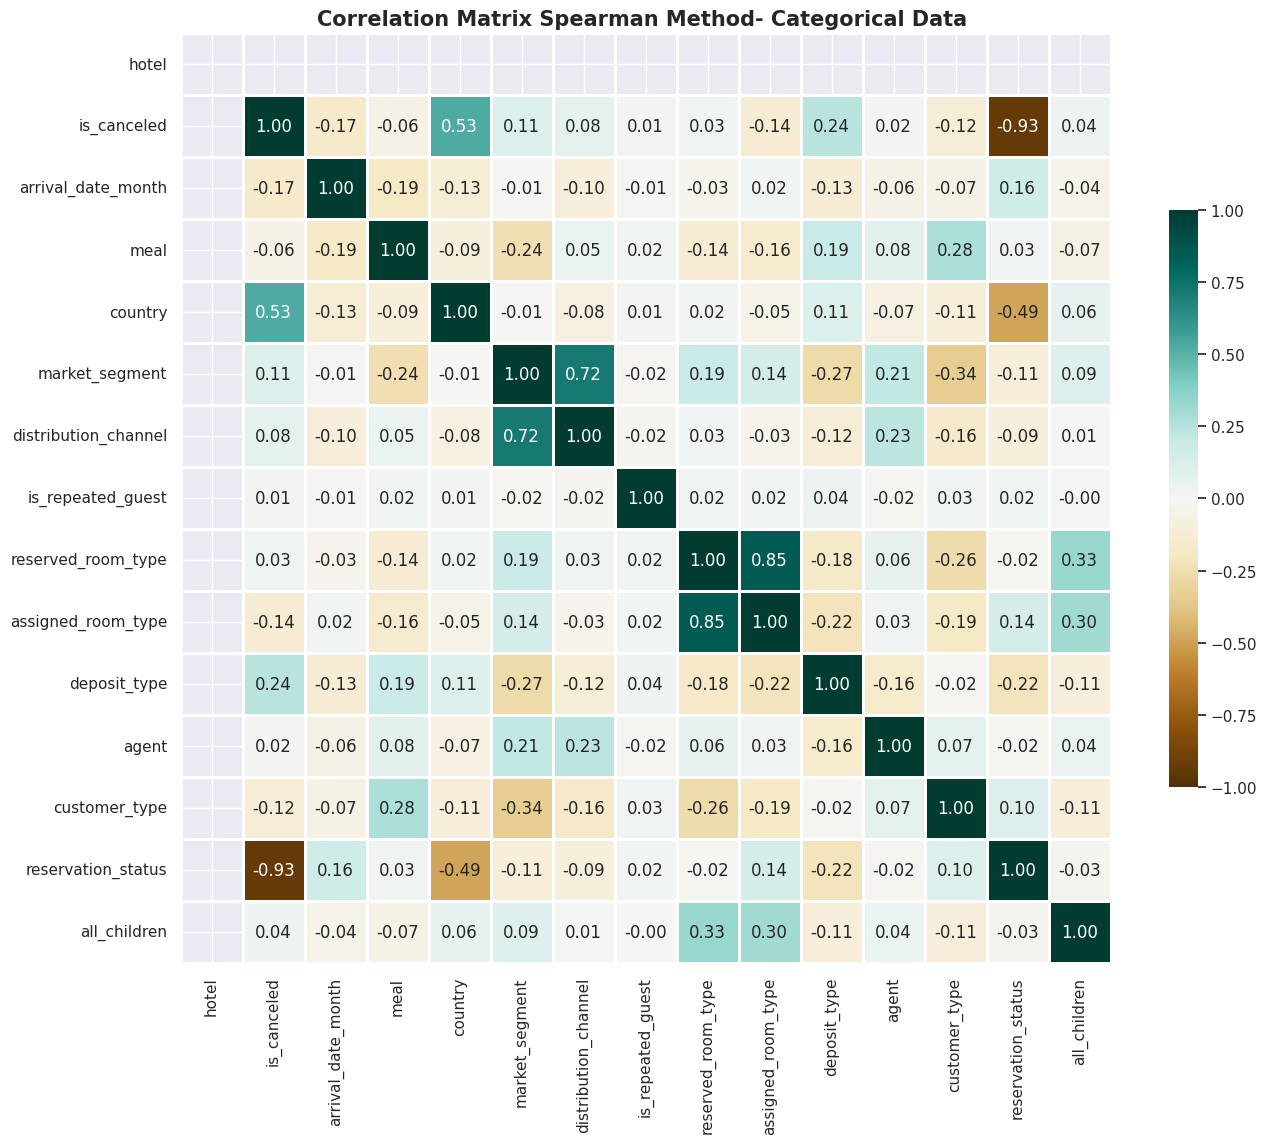

In [ ]:
# Spearman Method
plt.figure(figsize=(15,15))
corr_categorical=data_categorical.corr(method='spearman')
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

In [ ]:
print('customer_type:', full_data_clean['customer_type'].unique())
print('reservation_status', full_data_clean['reservation_status'].unique())
print('deposit_type', full_data_clean['deposit_type'].unique())
print('assigned_room_type', full_data_clean['assigned_room_type'].unique())
print('meal', full_data_clean['meal'].unique())
print('Country:',full_data_clean['country'].unique())
print('Dist_Channel:',full_data_clean['distribution_channel'].unique())
print('Market_seg:', full_data_clean['market_segment'].unique())
print('reserved_room_type:', full_data_clean['reserved_room_type'].unique())


customer_type: [2 0 3 1 4]
reservation_status [1 0 2 3]
deposit_type [0 2 1 3]
assigned_room_type [2 0 3 4 6 5 8 1 7 9]
meal [0 1 2 3]
Country: [50 26 60 22 33 25 61 51 46 47  4 48 19  7 11 14 28 36 45 20 52 56  5 23
 18  9 24 44 10 40 55  1 32 13 43 42 59 53 41 49 54 12  6  8 39 58 62  0
 35 17 63 15 64 21 38 16 31  3 57 37 30 29 34 27  2]
Dist_Channel: [2 0 3 1]
Market_seg: [2 1 5 4 0 3]
reserved_room_type: [1 0 2 3 5 4 6 7 8]


In [ ]:
new_data = full_data_clean.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

### Predict Cancellation

In [ ]:
cancel_corr = full_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

ValueError: could not convert string to float: 'Resort Hotel'

In [ ]:
full_data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             3330
1            Canceled              3825
             No-Show                117
Name: count, dtype: int64

# Feature Engineering

### Data Preprocessing for Feature Engineering

In [ ]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

#Creating Pipeline for the full_data
num_transformer = SimpleImputer(strategy="constant")

#Creating Pipeline for both kinds of data
# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [ ]:
print(X.shape)

(7273, 24)


In [ ]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:

    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

    cv_results = cross_val_score(model_steps,
                                 X, y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DT_model cross validation accuarcy score: 0.8182 +/- 0.0087 (std) min: 0.8058, max: 0.8267, 
RF_model cross validation accuarcy score: 0.8574 +/- 0.0025 (std) min: 0.8531, max: 0.8592, 
LR_model cross validation accuarcy score: 0.7429 +/- 0.0043 (std) min: 0.7382, max: 0.7497, 
XGB_model cross validation accuarcy score: 0.8552 +/- 0.0062 (std) min: 0.8482, max: 0.8647, 


In [ ]:
# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe,
                                 X, y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8607 +/- 0.0032 (std) min: 0.8559, max: 0.8647
